# Homework 2: Heapsort, Quicksort Algorithms Run-Time
## Author: Adam Camerer
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

This notebook uses time, numpy, copy, and pyplot

In [145]:
# Install all the prerequisite packages from the Terminal
#!pip install numpy
#!pip install matplotlib

In [146]:
from time import time_ns #more precise timing
import numpy as np
import matplotlib.pyplot as plt
import copy

## Plotting Run-Time Complexity

### Functions

#### Heap Sort

In [147]:
def max_heapify(arr, n, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1  # left = 2*i + 1
    r = 2 * i + 2  # right = 2*i + 2
  
 # See if left child of root exists and is
 # greater than root
  
    if l < n and arr[i] < arr[l]:
        largest = l
  
 # See if right child of root exists and is
 # greater than root
  
    if r < n and arr[largest] < arr[r]:
        largest = r
  
 # Change root, if needed
  
    if largest != i:
        (arr[i], arr[largest]) = (arr[largest], arr[i])  # swap
  
  # Heapify the root.
  
        max_heapify(arr, n, largest)
  

#function to build a max heap 
# Since last parent will be at ((n//2)-1) we can start at that location.
def build_max_heap(arr, n):
    for i in range(n // 2 - 1, -1, -1):
        max_heapify(arr, n, i)    


# The main function to sort an array of given size
def heapSort(arr):
    start_time = time_ns() / (10 ** 9)
    n = len(arr)
  
 # Build a maxheap.
    build_max_heap(arr, n)
  
 # One by one extract elements 
    for i in range(n - 1, 0, -1):
        (arr[i], arr[0]) = (arr[0], arr[i])  # swap
        max_heapify(arr, i, 0)
    finish_time = time_ns() / (10 ** 9)
    return finish_time-start_time

#### Insertion Sort

In [148]:
# Function to find the partition position
# Uses pivot at leftmost position.
def partition(array, low, high):
 
    # choose the leftmost element as pivot
    pivot = array[high]
 
    # pointer for greater element
    i = low - 1
 
    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
 
            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1
 
            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])
 
    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    # Return the position from where partition is done
    return i + 1


# function to perform quicksort
def quickSort(array, low, high):
    start_time = time_ns() / (10 ** 9)
    if low < high:
 
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)
 
        # Recursive call on the left of pivot
        quickSort(array, low, pi - 1)
 
        # Recursive call on the right of pivot
        quickSort(array, pi + 1, high)
        
    finish_time = time_ns() / (10 ** 9)
    return finish_time-start_time

### Function Execution

In [149]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [150]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
min_size_array = 10
max_size_array = 250
increments = 10

# Initiate average and worst case run-time
quickSort_avg_time_taken = [0]*(max_size_array//increments) #Quick Sort
quickSort_worst_time_taken = [0]*(max_size_array//increments)
heapSort_avg_time_taken = [0]*(max_size_array//increments) #Heap Sort
heapSort_worst_time_taken = [0]*(max_size_array//increments)


# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(min_size_array, max_size_array+1, increments): 
    quickSort_run_times = []
    heapSort_run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        array_copy = copy.deepcopy(array)
        array_max = len(array)-1
        quickSort_execution_time = quickSort(array, 0, array_max) #Insertion sort runtime
        heapSort_execution_time = heapSort(array_copy) #Merge sort runtime
        #print([maxElem_execution_time, insSort_execution_time, merSort_execution_time])
        
        quickSort_run_times.append(quickSort_execution_time)
        heapSort_run_times.append(heapSort_execution_time)
    
    #Empirical average of run time
    quickSort_avg_time_taken[count] = sum(quickSort_run_times)/len(quickSort_run_times)
    quickSort_worst_time_taken[count] = max(quickSort_run_times)
    
    #Empirical average of run-time
    heapSort_avg_time_taken[count] = sum(heapSort_run_times)/len(heapSort_run_times)
    heapSort_worst_time_taken[count] = max(heapSort_run_times)
    
    
    count += 1
#print(time_taken)

## Experiment Plotting

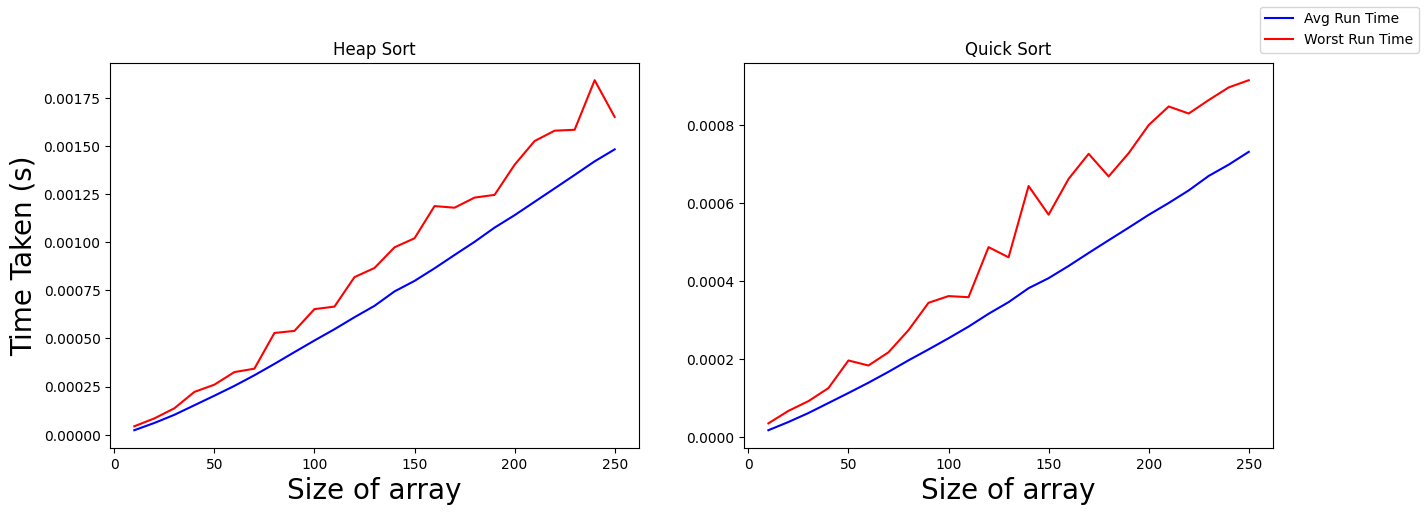

In [151]:
# Data Coordinates
x = np.arange(min_size_array, max_size_array+1, increments)
y = np.array(heapSort_avg_time_taken) #Heap Sort
z = np.array(heapSort_worst_time_taken)
a = np.array(quickSort_avg_time_taken) #Quick Sort
b = np.array(quickSort_worst_time_taken)

# Plot
fig_length = 5*2
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.plot(x,y,'b',label='Avg Run Time') #Heap Sort
ax0.plot(x,z,'r',label='Worst Run Time')
ax1.plot(x,a,'b') #Quick Sort
ax1.plot(x,b,'r')

# Add Title
ax0.set_title("Heap Sort")
ax1.set_title("Quick Sort")

# Add Axes Labels
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
#plt.xlabel("Size of Array")
#plt.ylabel("Time Taken")
#fig.xlabel("Size of Array") 
#fig.ylabel("Time Taken")
ax0.set_ylabel("Time Taken (s)", fontsize=20)
ax0.set_xlabel("Size of array", fontsize = 20)
ax1.set_xlabel("Size of array", fontsize = 20)

# Display
fig.legend()
fig.show()